### Introduction
Data Analysis for Kaggle Student Performance in available in: 
https://www.kaggle.com/datasets/spscientist/students-performance-in-exams


### Data description
Below are the description of the features/columns in the data:

<ul>
    <li>Gender: male/female</li>
    <li>Race/Ethnicity: group a,b,c,d,e </li>
    <li>Parental level of education: bachelor's degree, associate's degree, high school, some college, master's degree</li>
    <li>Lunch: standard, free/reduced</li>
    <li>Test Preparation: none, completed</li>
    <li>Math Score: score</li>
    <li>Reading Score: score</li>
    <li>Writing Score: score</li>
</ul>

## 1. Import relevant python libraries.

In [105]:
# import required packages for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from collections import Counter
%matplotlib inline

## 2. Load the data into the dataframe.

In [106]:
# Load data into data frame using pandas package - StudentsPerformance.csv.
stdPerformance_df = pd.read_csv('StudentsPerformance.csv')

In [107]:
# Display the data - first five & last five. Has 1000 rows & 8 columns.
stdPerformance_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [108]:
# Displaying first five data.
stdPerformance_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [109]:
# Calling the shape attribute of the train dataset we can observe that there are 1000 observations/rows and 8 features/columns
# in the data set
print ("Dataset shape: ", stdPerformance_df.shape)

Dataset shape:  (1000, 8)


## 3. Exploratory Data Analysis (EDA)
Exploratory data analysis is the process of visualising and analysing data to extract insights. In other words, we want to summarise important characteristics and trends in our data in order to gain a better understanding of our dataset.

### 3.1 Data types, missing data and summary statistics

In [110]:
# Non-null count and data types of the dataset. - all rows is fill with data
stdPerformance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [111]:
# Missing data in students performance set by columns
stdPerformance_df.isnull().sum().sort_values(ascending = False)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [112]:
# Dropping lunch column - unneeded
stdPerformance_df = stdPerformance_df.drop(['lunch', ], axis = 1)
stdPerformance_df.dropna(inplace = True)

# Remove spaces in columns and replace them with underscore 
stdPerformance_df.columns = stdPerformance_df.columns.str.replace(" ", "_")

# Set the name of the columns to all lowercase
stdPerformance_df.columns = map(str.lower, stdPerformance_df.columns)

# Rename race/ethnicity column to ethnicity
stdPerformance_df.rename(columns = {'race/ethnicity' : 'ethnicity'}, inplace = True)

In [113]:
# Check all the naming conversion and drop column
# Missing data in students performance set by columns
stdPerformance_df.isnull().sum().sort_values(ascending = False)

print ("Overall data frame shape: ", stdPerformance_df.shape)
print("-" * 40)
stdPerformance_df.info()

Overall data frame shape:  (1000, 7)
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   ethnicity                    1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   test_preparation_course      1000 non-null   object
 4   math_score                   1000 non-null   int64 
 5   reading_score                1000 non-null   int64 
 6   writing_score                1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


<AxesSubplot:>

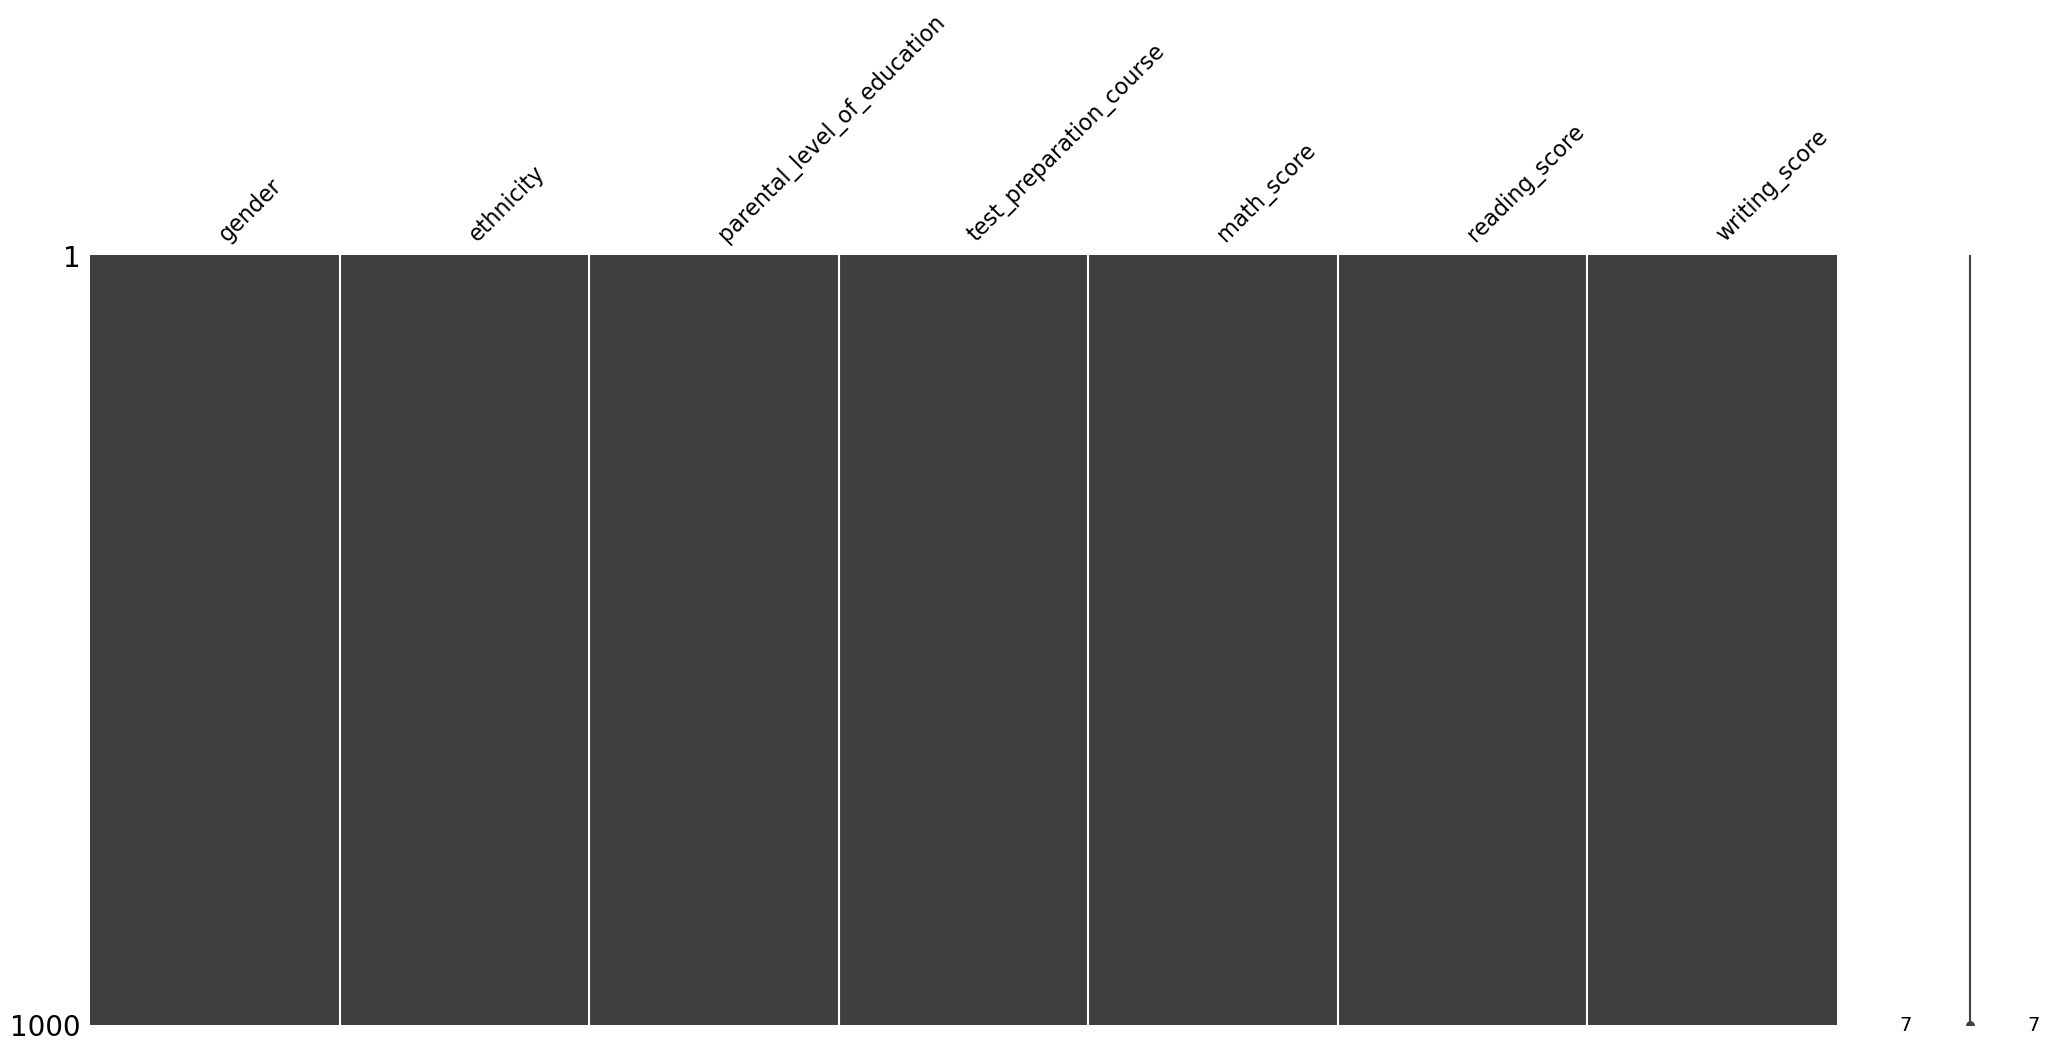

In [114]:
# Missing data in student performance set - all row was fill with data
missingno.matrix(stdPerformance_df)

In [115]:
# Display the overall descriptive statistics of the data.
stdPerformance_df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 3.2 Feature analysis

### 3.2.1 Categorical variables
Categorical variables in our dataset are <b>Gender</b>, <b>Race/Ethnicity</b>, <b>Parental level of education</b>, and <b>Test preparation Course</b>.

### 3.2.1.1 Categorical variable: Gender

In [116]:
# Value counts of the gender column - No missing values.
stdPerformance_df['gender'].value_counts(dropna = False)

female    518
male      482
Name: gender, dtype: int64

In [117]:
# Replace 'none' values as 0
stdPerformance_df['test_preparation_course'] = stdPerformance_df['test_preparation_course'].replace('none', 0)

# Replace 'completed' values as 1
stdPerformance_df['test_preparation_course'] = stdPerformance_df['test_preparation_course'].replace('completed', 1)

# Mean of performance by gender
stdPerformance_df[['gender', 'test_preparation_course']].groupby('gender', as_index = False).mean().sort_values(by = 'test_preparation_course', ascending = False)

,gender,test_preparation_course
1,male,0.360996
0,female,0.355212


Text(0.5, 1.0, ' test Preparation course')

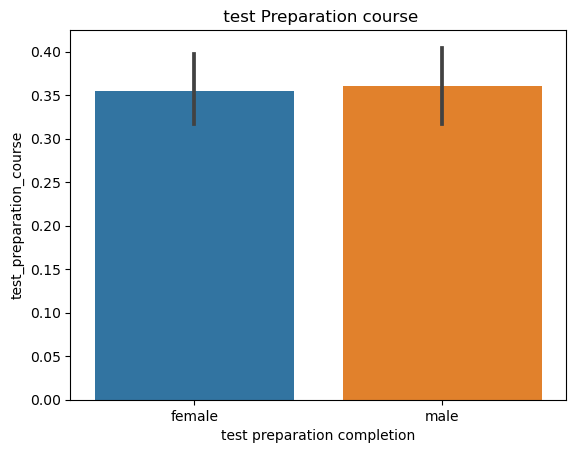

In [118]:
# Visualize the test preparation course completion vs gender on bar plot.
# male has slightly higher count in test preparation course completion than female
sns.barplot(x = 'gender', y ='test_preparation_course', data = stdPerformance_df)
plt.xlabel('test preparation completion')
plt.title(' test Preparation course')

<b>Analysis</b> - Male have slightly higher test preparation course completion than female

### 3.2.1.2 Categorical variable: Race/Ethnicity

In [119]:
# Value counts of the race/ethnicity column - No missing values.
stdPerformance_df['ethnicity'].value_counts(dropna = False)

group C    319
group D    262
group B    190
group E    140
group A     89
Name: ethnicity, dtype: int64

In [120]:
# Mean of test preparation by race/ethnicity
stdPerformance_df[['ethnicity', 'test_preparation_course']].groupby('ethnicity', as_index = False).mean().sort_values(by = 'test_preparation_course', ascending = False)

,ethnicity,test_preparation_course
4,group E,0.428571
2,group C,0.366771
1,group B,0.357895
0,group A,0.348315
3,group D,0.312977


Text(0.5, 1.0, ' test Preparation course')

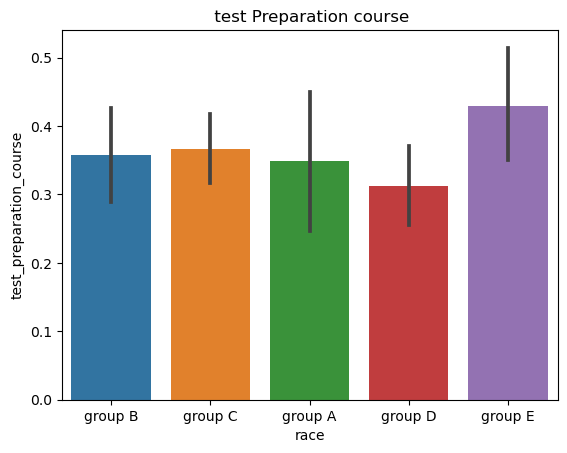

In [121]:
# Visualize the test preparation course completion vs race/ethnicity on bar plot.
sns.barplot(x = 'ethnicity', y ='test_preparation_course', data = stdPerformance_df)
plt.xlabel('race')
plt.title(' test Preparation course')

<b>Analysis</b> - Group E lead other race/ethnicity in the test preparation course completion followed by group c, b, a, and d 

### 3.2.1.3 Categorical variable: Parental Level of Education

In [122]:
# Value counts of the parent level of education column - No missing values.
stdPerformance_df['parental_level_of_education'].value_counts(dropna = False)

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [123]:
# Store the varieties of High school names in an array from the data displayed above: some high school/high school. 
# You may store them in lowercase for easy read.
highschool_list = ["some high school", "high school"]

# Correcting them by replacing them with the correct value, in this case we'll use high school.
# Use 'For Loop' to read through the row/column of the dataframe.
for (row,col) in stdPerformance_df.iterrows():
    # Check in every loop if the parental level of education is contained in the array created above.
    if col.parental_level_of_education in highschool_list: {
        # Replace using replace() function, provide the three paramenter needed.
        stdPerformance_df["parental_level_of_education"].replace(to_replace = col.parental_level_of_education, value = "high school", inplace = True)
    }

# Recheck the some high school using groupby() function again. Notice that some high school is already removed, calculated together with high school.
stdPerformance_df.groupby(by=["parental_level_of_education"], dropna=False).count()

,gender,ethnicity,test_preparation_course,math_score,reading_score,writing_score
parental_level_of_education,,,,,,
associate's degree,222,222,222,222,222,222
bachelor's degree,118,118,118,118,118,118
high school,375,375,375,375,375,375
master's degree,59,59,59,59,59,59
some college,226,226,226,226,226,226


In [124]:
# Value counts of the Parental level of education column - high school and some high school has been combine and become 375
stdPerformance_df['parental_level_of_education'].value_counts(dropna = False)

high school           375
some college          226
associate's degree    222
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [125]:
# Mean of preparation completion by parental level of education.
stdPerformance_df[['parental_level_of_education', 'test_preparation_course']].groupby(['parental_level_of_education'], as_index = False).mean().sort_values(by = 'test_preparation_course', ascending = False)

,parental_level_of_education,test_preparation_course
1,bachelor's degree,0.389831
0,associate's degree,0.369369
2,high school,0.354667
4,some college,0.340708
3,master's degree,0.338983


Text(0.5, 1.0, ' test Preparation course')

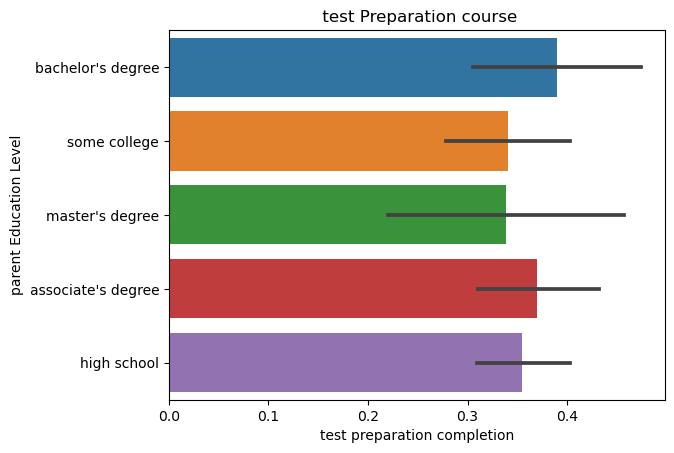

In [126]:
# Visualize the test preparation course completion respective on parental level of education on bar plot.
sns.barplot(y = 'parental_level_of_education', x ='test_preparation_course', data = stdPerformance_df, orient = 'h')
plt.ylabel('parent Education Level')
plt.xlabel('test preparation completion')
plt.title(' test Preparation course')

<b>Analysis</b> - Preparation completion probability is highest for bachelor's degree education level and lowest for master's degree education level.

Is there a reason for this occurence? We can formulate a hypothesis whereby the majority of the "group race/ethnicity" have  a parental level of education of bachelor's degree and because they have a highest preparation completion probability, this has resulted in bachelor's degree having a highest preparation completion probability. Alternatively, there could have been more "group race/ethnicity" that parental level of education is master's degree and because they have the lowest preparation completion probability, this has caused master's degree to have the lowest preparation completion probability.

Let us now test this hypothesis. 

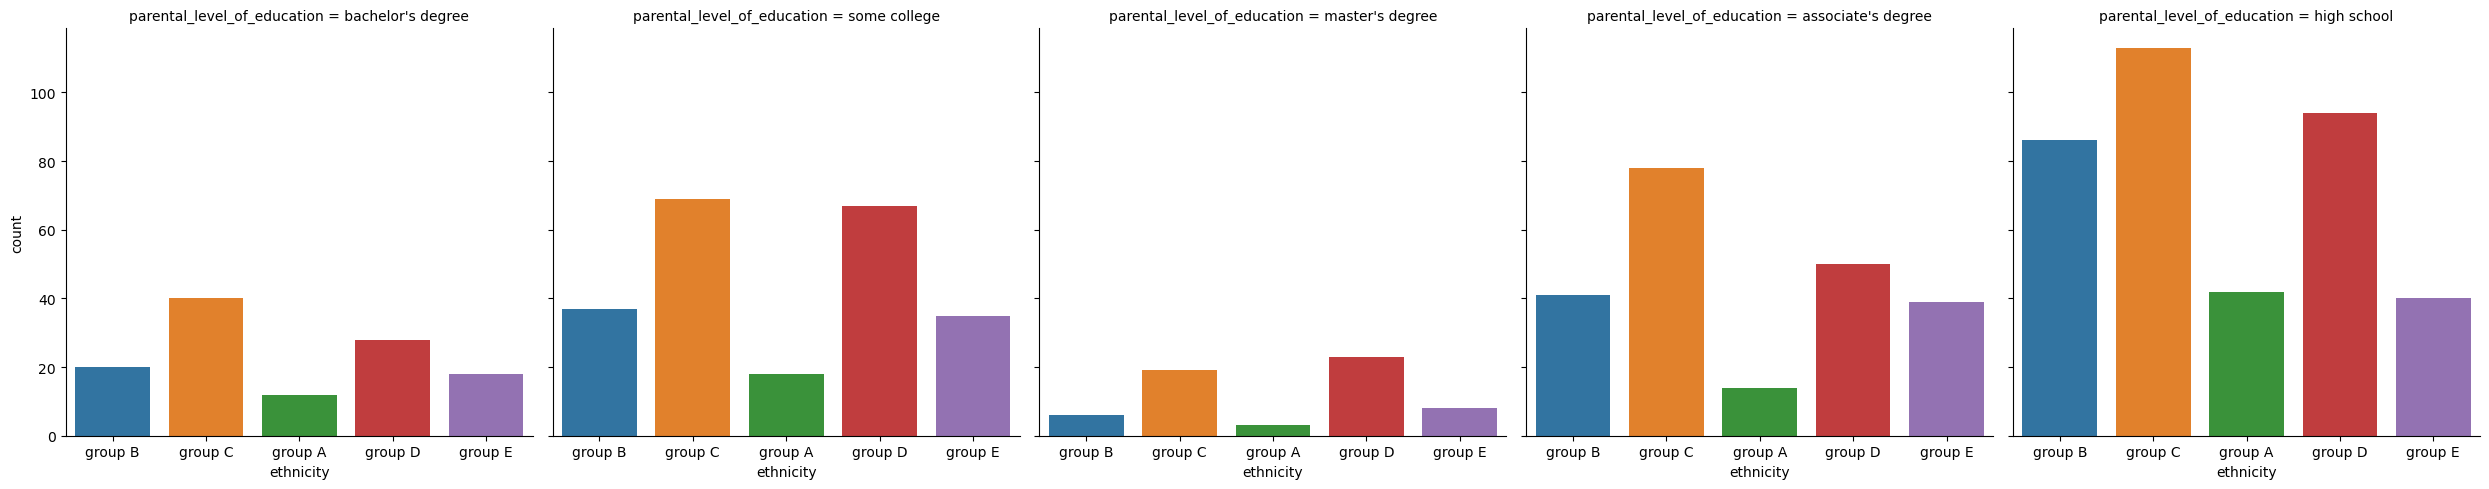

In [127]:
# Count each parent level of education with student race/ethnicity
sns.catplot(x = 'ethnicity', col = 'parental_level_of_education', data = stdPerformance_df, kind = 'count')

<b>Analysis</b> - The hypothesis appears to be true. master's degree has the most group D race/ethnicity whereas bachelor's degree has the most group C race/ethnicity.

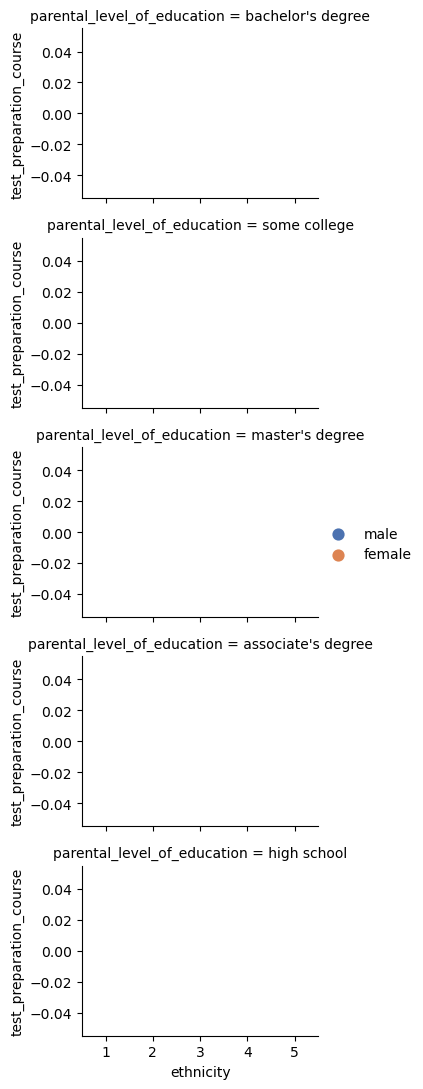

In [128]:
# Preparation completion probability by all categorical variables
grid = sns.FacetGrid(stdPerformance_df, row = 'parental_level_of_education', height = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'ethnicity', 'test_preparation_course', 'gender', palette='deep', order=[1, 2, 3, 4, 5], hue_order=["male","female"])
grid.add_legend()

### 3.2.2 Numerical variables
Numerical variables in our dataset are math score, reading score, writing score.

### Detect and remove outliers in numerical variables - you may do this during data cleaning
<ul>
    <li>Outliers are data points that have extreme values and they do not conform with the majority of the data.</li>
    <li>It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions.</li>
    <li>We will use the Tukey method to remove these outliers.</li>
</ul>

#### This function will loop through a list of features and detect outliers in each one of those features

1- In each loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds

2- third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range.

3- Once the outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next feature and the process repeats until the very last feature is completed.

4- Finally, using the list with outlier indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.

In [129]:
# count outliers or extremely high or low value in the dataset
def detect_outliers(df, n, features):
   
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(stdPerformance_df, 2, ['math_score', 'reading_score', 'writing_score'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 2 indices:  [59, 980]


In [130]:
# List out outliers in numerical variables (6 observations/rows)
# - gender, ethnicity, parental level of education, test preparation course, math score, reading score, writing score
stdPerformance_df.loc[outliers_to_drop, :]

,gender,ethnicity,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score
59,female,group C,high school,0,0,17,10
980,female,group B,high school,0,8,24,23


In [131]:
# Compare with an observation - the Fare of the outlier has extreme high value 7.25 vs 263
stdPerformance_df.head(1)

,gender,ethnicity,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,0,72,72,74


In [132]:
# Drop outliers and reset index
print("Before: {} rows".format(len(stdPerformance_df)))
stdPerformance_df = stdPerformance_df.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(stdPerformance_df)))

Before: 1000 rows
After: 998 rows


<AxesSubplot:>

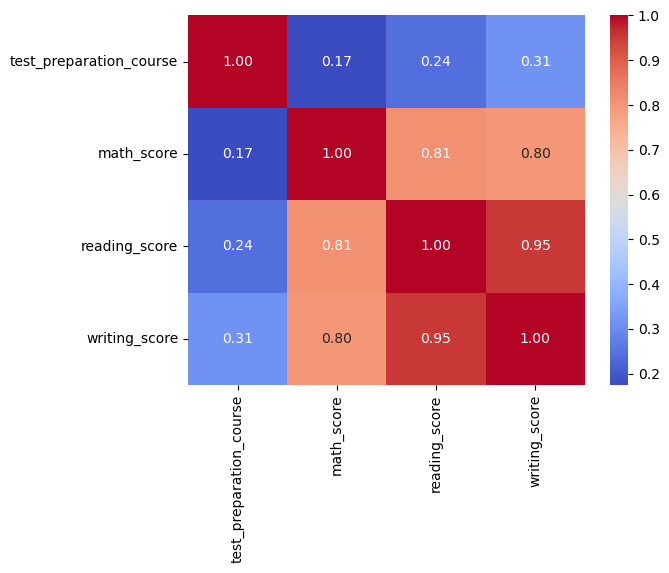

In [133]:
# Visualise the correlation of the Numerical variable with test preparation completion using heatmap 
# Fare seems to be the only feature that has a substantial correlation with survival - 0.26 (closer to 1)
sns.heatmap(stdPerformance_df[['test_preparation_course', 'math_score', 'reading_score', 'writing_score']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

### 3.2.2.1 Numerical variable: Math Score

In [134]:
# Null values in math score column - no missing value.
stdPerformance_df['math_score'].isnull().sum()

0

Text(0.5, 1.0, 'Math Score Distribution')

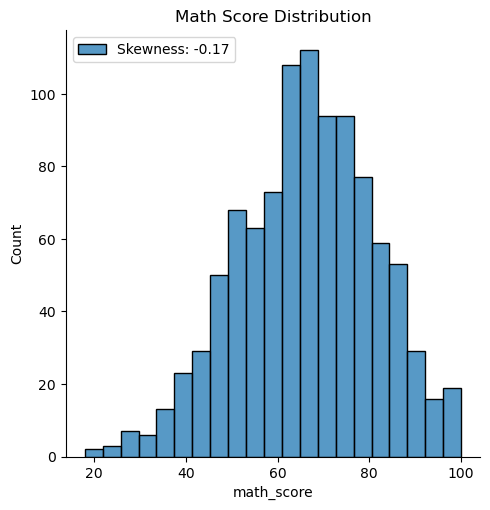

In [135]:
# Value count is not an appropriate measure to analyze the math score since its distributed across wide range of 0-100.
# Using displot to visualize the math score distribution
sns.displot(stdPerformance_df['math_score'], label = 'Skewness: %.2f'%(stdPerformance_df['math_score'].skew()))
plt.legend(loc = 'best')
plt.title('Math Score Distribution')

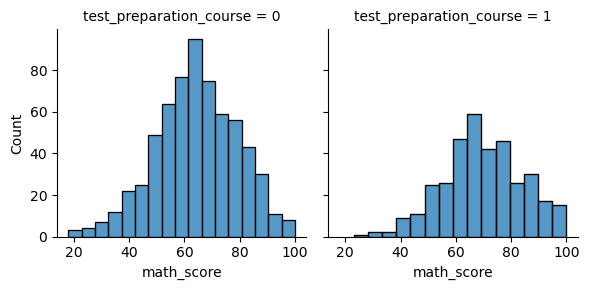

In [136]:
# math score distribution by test preparation course completion
g = sns.FacetGrid(stdPerformance_df, col = 'test_preparation_course')
g.map(sns.histplot, 'math_score')

Text(0.5, 1.0, 'math score performance by preparation completion')

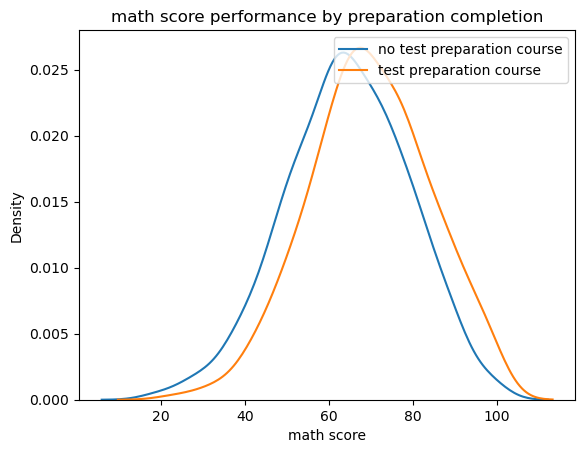

In [137]:
# Visualize student math score distribution by test preparation cource completion probability
sns.kdeplot(stdPerformance_df['math_score'][stdPerformance_df['test_preparation_course'] == 0], label = 'no test preparation course')
sns.kdeplot(stdPerformance_df['math_score'][stdPerformance_df['test_preparation_course'] == 1], label = 'test preparation course')
plt.legend(loc = "upper right")
plt.xlabel('math score')
plt.title('math score performance by preparation completion')

### 3.2.2.2 Numerical variable: Reading Score

In [138]:
# Null values of reading score column - no missing value.
stdPerformance_df['reading_score'].isnull().sum()

0

Text(4.944444444444445, 0.5, 'Student Reading Score Distribution')

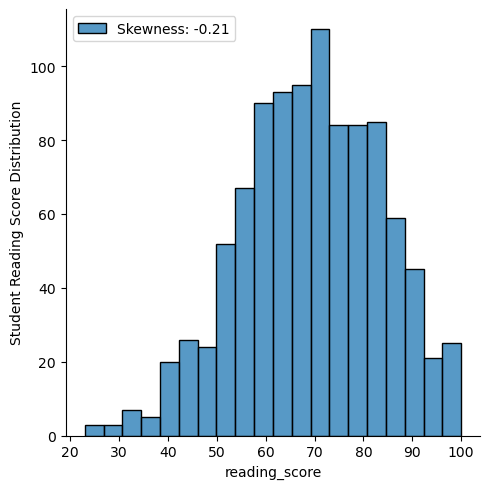

In [139]:
# student reading score distribution
sns.displot(stdPerformance_df['reading_score'], label = 'Skewness: %.2f'%(stdPerformance_df['reading_score'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Student Reading Score Distribution')

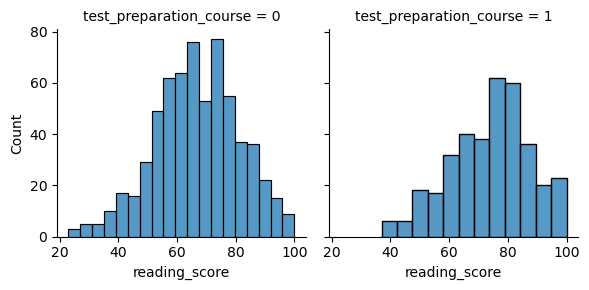

In [140]:
# reading score distribution by test preparation course completion
g = sns.FacetGrid(stdPerformance_df, col = 'test_preparation_course')
g.map(sns.histplot, 'reading_score')

Text(0.5, 1.0, 'reading score performance by test preparation completion')

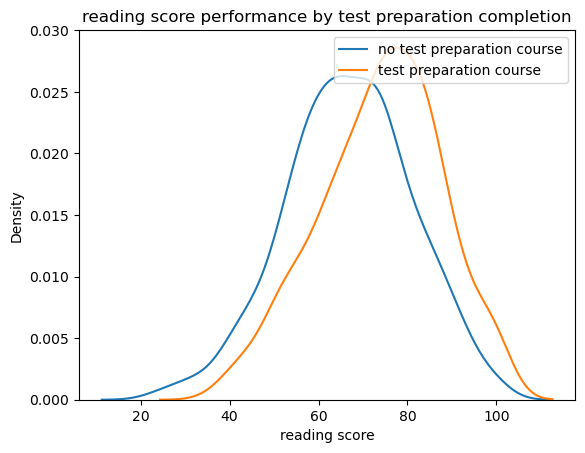

In [141]:
# Visualize student reading score distribution by test preparation course completion
sns.kdeplot(stdPerformance_df['reading_score'][stdPerformance_df['test_preparation_course'] == 0], label = 'no test preparation course')
sns.kdeplot(stdPerformance_df['reading_score'][stdPerformance_df['test_preparation_course'] == 1], label = 'test preparation course')
plt.legend(loc = "upper right")
plt.xlabel('reading score')
plt.title('reading score performance by test preparation completion')

### 3.2.2.3 Numerical variable: Writing Score

In [142]:
# Null values of writing score column - no missing value.
stdPerformance_df['writing_score'].isnull().sum()

0

Text(4.944444444444445, 0.5, 'Student Writing Score Distribution')

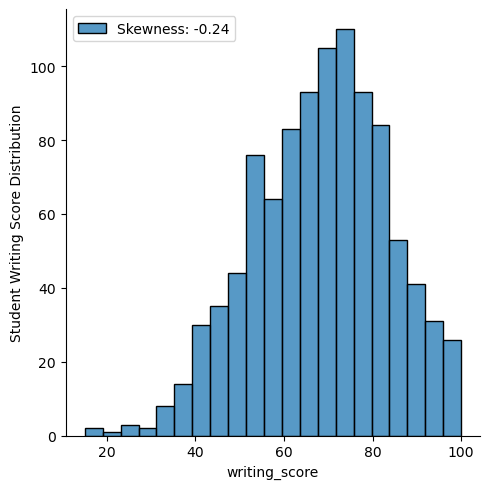

In [143]:
# student writing score distribution
sns.displot(stdPerformance_df['writing_score'], label = 'Skewness: %.2f'%(stdPerformance_df['writing_score'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Student Writing Score Distribution')

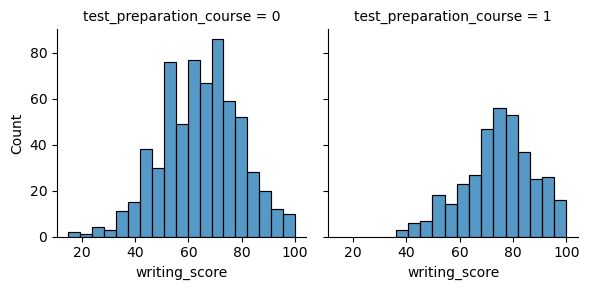

In [144]:
# writing score distribution by test preparation course completion
g = sns.FacetGrid(stdPerformance_df, col = 'test_preparation_course')
g.map(sns.histplot, 'writing_score')

Text(0.5, 1.0, 'Test Preparation Distribution by Completion')

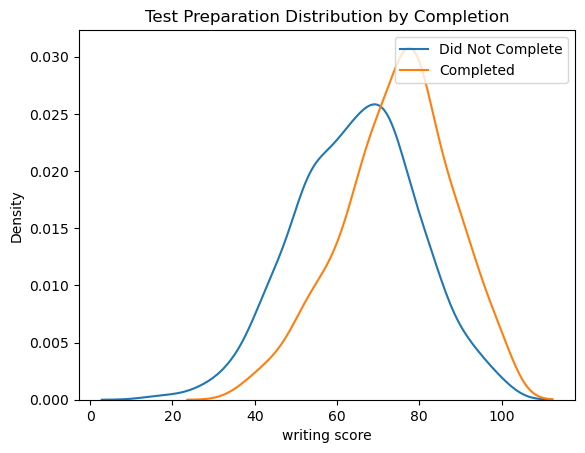

In [145]:
# Visualize writing score distribution by Completion
sns.kdeplot(stdPerformance_df['writing_score'][stdPerformance_df['test_preparation_course'] == 0], label = 'Did Not Complete')
sns.kdeplot(stdPerformance_df['writing_score'][stdPerformance_df['test_preparation_course'] == 1], label = 'Completed')
plt.legend(loc = "upper right")
plt.xlabel('writing score')
plt.title('Test Preparation Distribution by Completion')

### 5. Data Cleaning

Drop both Ticket and Cabin column for simplicity of this tutorial. Replace the null values with appropriate values.

Having missing values in a dataset can cause errors with some machine learning algorithms and either the rows that has missing values should be removed or imputed.

Imputing: using a model to replace missing values.

There are many options we could consider when replacing a missing value, for example:

<ul>
    <li>constant value that has meaning within the domain, such as 0, distinct from all other values.</li>
    <li>value from another randomly selected record.</li>
    <li>mean, median or mode value for the column.</li>
    <li>value estimated by another predictive model.</li>
</ul>

As an example, if the value only has few categories (e.g., Embarked), you may replace them with mode value (most frequently occuring value), or if the values span across wide range of values (e.g., Age/Fare) then you may use median (central number of the dataset) or mean (average value of the dataset).